objectif : electricité prix
recup auto du prix de l élect
affichage graphe evolution prix elect et tenter une explication

In [1]:
#import paquet
import pandas as pd
import fonctions.perso_pandas as ppd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
sns.set_theme(style="darkgrid")
sns.set_palette('Dark2')

In [3]:
#telechargement fichier prix elect
os.system('curl -o data/evolution-des-prix-domestiques-du-gaz-et-de-lelectricite.csv https://odre.opendatasoft.com/explore/dataset/evolution-des-prix-domestiques-du-gaz-et-de-lelectricite/download?format=csv')


  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1328    0  1328    0     0   5276      0 --:--:-- --:--:-- --:--:--  5290


0

In [3]:
dataprix = pd.read_csv("data/evolution-des-prix-domestiques-du-gaz-et-de-lelectricite.csv",sep=';')

In [5]:
ppd.analyseDataFrame(dataprix)

################################# INFO  #################################
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   annee               54 non-null     int64 
 1   semestre            54 non-null     object
 2   u_e_gaz_naturel     54 non-null     int64 
 3   france_gaz_naturel  54 non-null     int64 
 4   u_e_electricite     54 non-null     int64 
 5   france_electricite  54 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 2.7+ KB
################################# DESCRIBE  #################################


,annee,semestre,u_e_gaz_naturel,france_gaz_naturel,u_e_electricite,france_electricite
count,54.000000,54,54.000000,54.000000,54.000000,54.000000
unique,NaN,2,NaN,NaN,NaN,NaN
top,NaN,S1,NaN,NaN,NaN,NaN
freq,NaN,27,NaN,NaN,NaN,NaN
mean,2008.000000,NaN,52.925926,51.870370,168.462963,140.981481
std,7.862018,NaN,15.043148,17.080328,35.283067,26.559645
min,1995.000000,NaN,31.000000,29.000000,129.000000,115.000000
25%,2001.250000,NaN,38.500000,36.000000,133.000000,119.000000
50%,2008.000000,NaN,55.500000,52.000000,163.500000,128.500000
75%,2014.750000,NaN,66.750000,67.750000,206.000000,165.750000


################################# HEAD  #################################


,annee,semestre,u_e_gaz_naturel,france_gaz_naturel,u_e_electricite,france_electricite
0,1998,S1,35,33,133,127
1,2004,S2,37,36,132,119
2,2006,S2,50,48,144,119
3,2007,S2,51,51,156,122
4,2012,S1,65,63,191,139


################################# DOUBLONS  #################################


,annee,semestre,u_e_gaz_naturel,france_gaz_naturel,u_e_electricite,france_electricite


################################## recherche de clé pour merge ###################
pas de clé


In [6]:
# je m interesse que à l'élec suppression colonne gaz naturel
dataprix.drop(columns='u_e_gaz_naturel',inplace=True)
dataprix.drop(columns='france_gaz_naturel',inplace=True)
dataprix.drop(columns='semestre',inplace=True)

In [7]:
dataprix = dataprix.groupby(['annee'],sort=True).agg('mean')

In [8]:
dataprix.to_csv('donnee/dataprix.csv')

In [9]:
dataprix.head(40)

,u_e_electricite,france_electricite
annee,,
1995,134.0,127.5
1996,133.0,132.0
1997,133.5,129.5
1998,132.5,125.5
1999,130.5,118.5
2000,132.5,116.0
2001,131.5,115.0
2002,132.5,116.0
2003,135.0,116.0


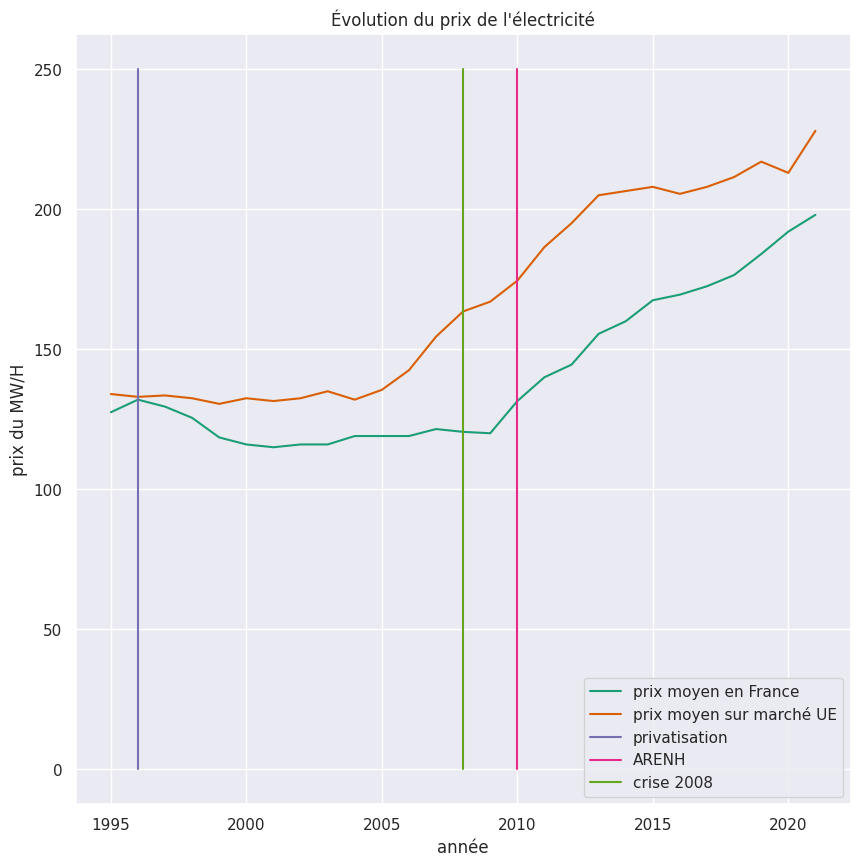

In [12]:
#affichage de l'evolution des prix + date importantes
dataprix.reset_index(inplace=True)
fig,ax = plt.subplots(figsize=(10,10))

ax.plot(dataprix['annee'],dataprix['france_electricite'],label='prix moyen en France')
ax.plot(dataprix['annee'],dataprix['u_e_electricite'],label='prix moyen sur marché UE')
ax.plot([1996,1996],[0,250],label='privatisation')
ax.plot([2010,2010],[0,250],label='ARENH')
ax.plot([2008,2008],[0,250],label='crise 2008')
ax.legend()
ax.set_title("Évolution du prix de l'électricité")
ax.set_xlabel('année')
ax.set_ylabel('prix du MW/H')
plt.show()

A premiere vue, la cause serait la crise de 2008(subprime), qui a des répercutions à partir de 2009</br>
Une autre crise energétique est en cours (Ukraine). A voir avec la mise à jour des prix.